In [ ]:
Neste notebook trarei dados a respeito da violência policial em alguns estados dos EUA, descobriremos se algumas
variáveis estão correlacionadas e, se possível, criaremos um modelo de regressão linear. Serão mostrados também alguns
erros comuns que ocorrem durante o processo e como resolvê-los

In [34]:
#Importando bilbiotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sts
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [2]:
#Carregando os dados sobre violência policial
dados = pd.read_csv("deaths_arrests.csv")
dados

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Podemos perceber que o dataset possui várias linhas inteiras sem nenhum conteúdo, precisaremos remover todas essas linhas.
#Abrindo o arquivo podemos ver que os dados vão somente até a linha 102, então removeremos da linha 103 até 1005


dados = dados.dropna(axis = 0, how = "all")
dados


,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Kansas,Wichita,Wichita Police Department,1.0,2.0,NaN,NaN,NaN,10.0,NaN,...,3932.0,10.3,10566.0,9323.0,9307.0,9120.0,8322.0,3931.0,8000.6,16.2
99,North Carolina,Winston-Salem,Winston-Salem Police Department,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1561.0,6.8,19742.0,18875.0,16146.0,15432.0,NaN,12786.0,15809.75,1.9
100,United States,Big Cities Average,Big Cities Average,759.0,464.0,19.0,46.0,16.0,528.0,132.0,...,466620.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.8
101,United States,Nationwide Average,Nationwide Average,1957.0,1338.0,111.0,120.0,42.0,3417.0,641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Sobrou uma última linha que contém apenas um valor. Vamos removê-la também.
#Além disso temos duas linhas com os valores totais. Elas podem influenciar muito no cálculo da correlação, vamos removê-las.
dados = dados.drop([100, 101, 105])
dados

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Arizona,Tucson,Tucson Police Department,2.0,10.0,NaN,NaN,NaN,10.0,6.0,...,3862.2,7.4,31892.0,32313.0,32294.0,33442.0,30569.0,28858.0,31495.2,8.9
96,Oklahoma,Tulsa,Tulsa Police Department,7.0,4.0,NaN,1.0,NaN,14.0,1.0,...,3937.3,10.0,16360.0,14739.0,15769.0,14311.0,12666.0,13303.0,14157.6,19.1
97,Virginia,Virginia Beach,Virginia Beach Police Department,3.0,NaN,NaN,NaN,NaN,2.0,1.0,...,644.8,1.5,24359.0,23247.0,20259.0,19190.0,18668.0,17071.0,19687,3.0
98,Kansas,Wichita,Wichita Police Department,1.0,2.0,NaN,NaN,NaN,10.0,NaN,...,3932.0,10.3,10566.0,9323.0,9307.0,9120.0,8322.0,3931.0,8000.6,16.2


In [5]:
#Agora podemos começar a descobrir se existe correlação entre algumas variáveis. 
#Primeiro veremos se existe correlação entre o número de pessoas negras habitantes de uma cidade e o número de pessoas negras mortas pela polícia
#Definiremos como x o total de habitantes negros e como y o total de negros mortos pela polícia
x = dados.iloc[:, 12].values
y = dados.iloc[:, 3].values
y


array([ 3.,  3.,  1.,  7., 13.,  9.,  5.,  3., 27., 10.,  4.,  9.,  1.,
       nan, 12.,  2., 56., nan,  8.,  9.,  2., 27.,  1., 15., 16.,  1.,
        7.,  5.,  2.,  5.,  9.,  1.,  1.,  2.,  2.,  1.,  1.,  1., nan,
       33., 16., nan,  2., 20.,  8., 17., nan, 12.,  1.,  2.,  7., 27.,
       12., nan,  3., 15., nan,  6.,  3., 14.,  5., 10., 48.,  7.,  7.,
        2.,  7., 24.,  6.,  9., 21., 15.,  6., nan,  4.,  2.,  3.,  3.,
        2.,  5.,  8., nan,  2.,  5.,  1.,  1.,  1.,  4.,  1., 36.,  5.,
        2.,  5.,  4.,  3.,  2.,  7.,  3.,  1.,  3.])

In [6]:
#Visualizando o resultado podemos ver que ainda existem valores faltantes em algumas linhas. 
#Isso ocorre pois na tabela ao invés de colocarem o valor "0" quando não houve ocorrências, deixaram as células em branco.
#Portanto substituíremos os valores faltantes por 0

dados["Black People Killed by Police (1/1/2013-12/31/2019)"].fillna(0, inplace = True)
dados.isnull().sum()

State                                                             0
City                                                              0
PD                                                                0
Black People Killed by Police (1/1/2013-12/31/2019)               0
Hispanic People Killed by Police (1/1/2013-12/31/2019)           31
Native American People Killed by Police (1/1/2013-12/31/2019)    90
Asian People Killed by Police (1/1/2013-12/31/2019)              69
Pacific Islanders Killed by Police (1/1/2013-12/31/2019)         93
White People Killed by Police (1/1/2013-12/31/2019)              11
Unknown Race People Killed by Police (1/1/2013-12/31/2019)       52
All People Killed by Police (1/1/2013-12/31/2019)                 0
Total                                                             0
Black                                                             0
White                                                             0
Amer. Indian                                    

In [7]:
#Agora que não temos valores faltantes em nenhuma das duas colunas que usaremos, podemos calcular a correlação
correlacao1 = np.corrcoef(x, y)
correlacao1

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [8]:
#O erro acima indica que na nossa variável x temos dados do tipo texto, e na variável y dados do tipo inteiro
#É impossível fazer o cálculo da correlação com tipos diferentes de dados, portanto precisaremos converter os dados texto para inteiros.
vector = np.vectorize(int)
X = np.array([x])
X = vector(X)
print(X)


ValueError: invalid literal for int() with base 10: '14,878'

In [9]:
#Encontramos mais um erro, o erro acima indica que não foi possível fazer a conversão
#Isso acontece pois temos vírgulas nos valores da coluna escolhida, portanto iremos remover todas as vírgulas
#Lembrando que nos EUA as vírgulas não são usadas para separar casas decimais, então não é um problema removê-las
#Para isso criaremos uma função de remover vírgulas
def remover_virgulas(valor):
    valor = valor.replace(",","")
    return valor

In [10]:
#Agora vamos aplicar essa função na coluna em que encontramos o erro
dados["Black"] = dados["Black"].apply(remover_virgulas)
dados["Black"]

0      14878
1       8209
2      15308
3      67087
4     224316
       ...  
95     23362
96     61230
97     83210
98     42676
99     78065
Name: Black, Length: 100, dtype: object

In [11]:
#Agora finalmente podemos realizar a conversão
vector = np.vectorize(int)
X = np.array([x])
x = vector(X)
print(x)

[[  14878    8209   15308   67087  224316   49003   60760   26677  392938
   124542  155258  138073   97637   10580  252007   65204  872286    9972
   132307  208208   24391  217694   11912  294159  301053   58388  586573
    92285   18155   38514  136941    6743   37885   32164   12766  108233
    12471    6066   26690  485956  223053    3494   25550  247516   59060
   135916     478   62008   42336    9541   59925  347380  135138   18744
    16507  408075   14101  169272   64993  233325   69971  204866 1861295
   138074  102452   41561  106637   85744   55128   63584  644287   86788
    78847   19199   35462  115976    5990   19917   83346   64967   83365
    29897   82497   46781   27508    3177    3484   47113    4643  156389
    43620   57489   33507   83032   76820   23362   61230   83210   42676
    78065]]


In [12]:
#E com os valores no mesmo formato podemos calcular a correlação

correlacao1 = np.corrcoef(x, y)
correlacao1

array([[1.        , 0.77564352],
       [0.77564352, 1.        ]])

In [13]:
#Obtivemos um valor de correlação de aproximadamente 0.776
#Esse valor é razoável para utilizarmos um modelo de regressão linear
#Nosso objetivo é calcular o número esperado de pessoas negras que seriam mortas pela polícia baseados no número de habitantes de uma cidade

x = x.reshape(-1, 1)
modelo1 = LinearRegression()
modelo1.fit(x, y)

LinearRegression()

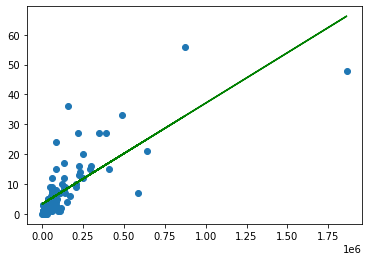

In [14]:
#Agora podemos visualizar o modelo em um gráfico.
#A linha verde representa as previsões do modelo, os pontos azuis representam os dados que utilizamos para a criação
plt.scatter(x, y)
plt.plot(x, modelo1.predict(x), color = 'green')

In [15]:
#Vamos usar o modelo para responder algumas perguntas
resp = modelo1.predict([[470000]])
resp2 = modelo1.predict([[120000]])
print("Pergunta: Qual o número de pessoas negras mortas pela polícia que é esperado em uma cidade estadunidense com 470mil habitantes negros?")
print("Resposta: ", int(resp))
print("")
print("Pergunta: E em uma cidade com 120mil?")
print("Resposta: ", int(resp2))
      

Pergunta: Qual o número de pessoas negras mortas pela polícia que é esperado em uma cidade com 470mil habitantes negros?
Resposta:  19

Pergunta: E em uma cidade com 120mil?
Resposta:  7


In [23]:
#Não podemos assumir que certa correlação implique em causalidade.
#Entretanto podemos avaliar se usar um número maior de variáveis pode nos trazer uma correlação maior.
#Para isso vamos calcular o coeficiente de determinação ajustado para o modelo anterior e para um com mais variáveis.
#O coeficiente de determinação é calculado elevando-se ao quadrado o coeficiente de correlação
#Um r² = 0.60 indica que existe uma redução de 60% da variância ao levarmos em conta o número de habitantes negros da cidade.
#Em outras palavras: O número de habitantes negros da cidade "explica" 60% da variação observada no número de pessoas negras mortas pela polícia.

modelo_simples = sm.ols(formula = 'y ~ x', data = dados)
modelo_simples_treinado = modelo_simples.fit()
modelo_simples_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.67e-21
Time:                        15:39:43   Log-Likelihood:                -324.15
No. Observations:                 100   AIC:                             652.3
Df Residuals:                      98   BIC:                             657.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3128      0.717      4.620      0.000       1.890       4.736
x           3.378e-05   2.78e-06     12.165      0.000    2.83e-05    3.93e-05
==============================================================================
Omnibus:                       49.479   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.733
Skew:                           1.634   Prob(JB):                     2.83e-41
Kurtosis:                       8.842   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Vamos agora incluir no modelo mais uma variável, a taxa de homícidios de cada estado.
#Depois iremos avaliar se a inclusão de uma nova variável resultou em um coeficiente de determinação maior.

z = dados.iloc[:, 23].values
modelo_multipla = sm.ols(formula = 'y ~ x + z', data = dados)
modelo_multipla_treinado = modelo_multipla.fit()
modelo_multipla_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     73.29
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.04e-20
Time:                        16:04:27   Log-Likelihood:                -324.13
No. Observations:                 100   AIC:                             654.3
Df Residuals:                      97   BIC:                             662.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4038      0.872      3.904      0.000       1.673       5.134
x           3.373e-05    2.8e-06     12.045      0.000    2.82e-05    3.93e-05
z             -0.0062      0.033     -0.185      0.853      -0.073       0.060
==============================================================================
Omnibus:                       49.226   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.163
Skew:                           1.626   Prob(JB):                     6.20e-41
Kurtosis:                       8.819   Cond. No.                     3.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#O valor do coeficiente de determinação ajustado (adj. r²), não aumentou com a inclusão de mais uma variável 
#Podemos inferir que essa variável é redundante ou prejudicial ao modelo.
#Além disso temos evidências de outros problemas, como a multicolinearidade. 
#Vamos agora criar mais um modelo, dessa vez para prever o número de habitantes brancos mortos pela polícia
#Serão feitos os mesmos passos anteriores, então não será explicada novamente cada etapa do processo.

dados["White People Killed by Police (1/1/2013-12/31/2019)"].fillna(0, inplace = True)
dados["White"] = dados["White"].apply(remover_virgulas)
xb = dados.iloc[:, 13].values
yb = dados.iloc[:, 8].values
vector = np.vectorize(int)
Xb = np.array([xb])
xb = vector(Xb)
correlacao2 = np.corrcoef(xb, yb)
correlacao2

array([[1.        , 0.39809618],
       [0.39809618, 1.        ]])

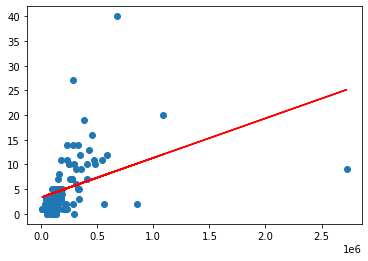

In [35]:
#A baixa correlação entre as duas variáveis é um indicativo de que não teríamos um modelo preciso
#É possível observar essa baixa correlação na forma de gráfico. Os pontos de observação estão mais distantes da reta do que no modelo anterior

xb = xb.reshape(-1, 1)
modelo2 = LinearRegression()
modelo2.fit(xb, yb)
plt.scatter(xb, yb)
plt.plot(xb, modelo1.predict(xb), color = 'red')

In [ ]:
O objetivo do estudo era demonstrar os códigos e os possíveis erros em um modelo de regressão linear. 
Não é possível tirar grandes conclusões a partir dos modelos criados. O número de pessoas negras e brancas mortas pela polícia
varia de acordo com vários outros fatores. Os dados, que são reais, foram utilizados aqui somente com um fim didático. 